# Hand-sign Detection
# *---------------------------*

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'
nb_train_samples = 3200
nb_validation_samples = 400
nb_test_samples = 440
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


# Data Preprocessing

In [10]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


# Building Model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation = 'relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Summary

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 73984)             0         
__________

# Training model

In [13]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/10
200/200 [==============================] - 274s 1s/step - loss: 0.6798 - acc: 0.6691 - val_loss: 0.4670 - val_acc: 0.8025
Epoch 2/10
200/200 [==============================] - 271s 1s/step - loss: 0.2809 - acc: 0.8916 - val_loss: 0.3159 - val_acc: 0.9025
Epoch 3/10
200/200 [==============================] - 272s 1s/step - loss: 0.1902 - acc: 0.9366 - val_loss: 0.1544 - val_acc: 0.9775
Epoch 4/10
200/200 [==============================] - 271s 1s/step - loss: 0.3407 - acc: 0.9516 - val_loss: 0.2317 - val_acc: 0.9550
Epoch 5/10
200/200 [==============================] - 270s 1s/step - loss: 0.0799 - acc: 0.9738 - val_loss: 0.1621 - val_acc: 0.9900
Epoch 6/10
200/200 [==============================] - 275s 1s/step - loss: 0.1112 - acc: 0.9753 - val_loss: 0.3152 - val_acc: 0.9650
Epoch 7/10
200/200 [==============================] - 274s 1s/step - loss: 0.1720 - acc: 0.9738 - val_loss: 0.5622 - val_acc: 0.9025
Epoch 8/10
200/200 [==============================] - 290s 1s/step - 

In [14]:
model.save('first_try.h5')

# Model Accuracy on Test dataset

In [15]:
prediction = model.predict_generator(test_generator)

# Testing single image

In [16]:
from keras.models import load_model
import keras.backend as K
from keras.preprocessing import image 
import numpy as np
import matplotlib.pyplot as plt

loaded_model = load_model("first_try.h5")

# 'One sign' Image

Available classes {'one': 0, 'peace': 1}
image belongs to class  [[0.]]
Sign is  one


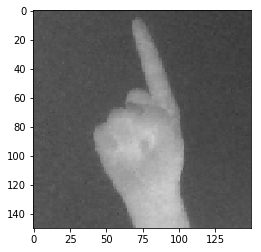

In [17]:
test_image = image.load_img('Test-Images/one/one.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)

plt.imshow(test_image.reshape(150, 150,3).astype('uint8'))

print("Available classes" ,train_generator.class_indices)
print("image belongs to class ",result)
if result[0][0] == 1:
    prediction = 'peace'
else:
    prediction = 'one'
print ("Sign is ",prediction)

# 'Peace sign' Image

Available classes {'one': 0, 'peace': 1}
image belongs to class  [[0.]]
Sign is  one


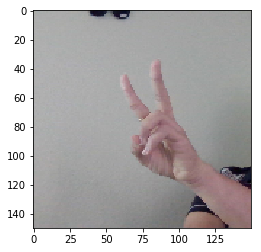

In [18]:
test_image2 = image.load_img('Test-Images/peace/peace2.jpg', target_size = (150, 150))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = model.predict(test_image2)

plt.imshow(test_image2.reshape(150, 150,3).astype('uint8'))

print("Available classes" ,train_generator.class_indices)
print("image belongs to class ",result2)
if result2[0][0] == 1:
    prediction2 = 'peace'
else:
    prediction2 = 'one'
print ("Sign is ",prediction2)